In [2]:
%matplotlib inline
import jieba
import matplotlib
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import collections
from pandas.plotting import scatter_matrix

In [3]:
txt = open("2020gov.txt", encoding="utf-8").read() 
words = jieba.lcut(txt) 

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\jiani\AppData\Local\Temp\jieba.cache
Loading model cost 0.808 seconds.
Prefix dict has been built successfully.


In [4]:
count = {}
for word in words:            
    if len(word) < 2:         
        continue
    else:
        count[word] = count.get(word, 0) + 1    

In [5]:
exclude = ["可以", "一起", "这样"]
for key in pd.DataFrame(count.keys()):     
    if key in exclude:
        del count[key]                  
        
df = pd.DataFrame(count.items(),columns = ['Key Words','Frequence'])        
df = df.sort_values(by='Frequence',ascending=False)
df

,Key Words,Frequence
54,发展,72
108,就业,40
16,疫情,31
167,企业,31
612,支持,29
...,...,...
823,减租,1
821,用于,1
820,利民,1
819,惠企,1


In [6]:
df.describe()

,Frequence
count,1744.000000
mean,2.227064
std,3.506578
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,72.000000


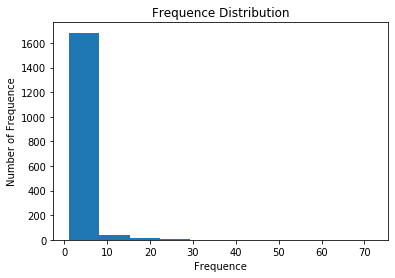

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['Frequence'], bins = 10, range = (df['Frequence'].min(),df['Frequence'].max()))
plt.title('Frequence Distribution')
plt.xlabel('Frequence')
plt.ylabel('Number of Frequence')
plt.show()

In [8]:
count = sum(i > 10 for i in df.Frequence)
count

45

In [9]:
df=df[df.Frequence > 10]
df['Number'] = np.arange(len(df))
df.set_index('Number',inplace=True)
df.index=df.index+1
df.style.set_properties(**{'text-align': 'right'})

C:\Users\jiani\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Key Words,Frequence
Number,,
1,发展,72
2,就业,40
3,疫情,31
4,企业,31
5,支持,29
6,建设,25
7,经济,24
8,保障,23
9,推进,23


# Word Cloud

In [10]:
from wordcloud import WordCloud
from matplotlib.pyplot import imread
from django.urls import path

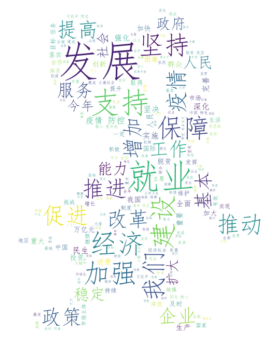

In [13]:
path_txt = '2020gov.txt'
path_img = "jerry.jpg"
f = open('2020gov.txt', 'r', encoding='UTF-8').read()
background_image = np.array(imread(path_img))
   
cut_text = " ".join(jieba.cut(f))

wordcloud = WordCloud(font_path="C:/Windows/Fonts/simfang.ttf",width=1000,height=1500,background_color="white", mask=background_image,
    contour_color='black').generate(cut_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud.recolor(), interpolation="bilinear")
plt.axis("off")
plt.show()